In [1]:
import os
import numpy as np
import pandas as pd
import datetime as dt
from collections import namedtuple
import ast, swifter
import math
import portion as P
from pprint import pprint
import itertools as it
import random

In [2]:
src_dir = "/Users/jackbedford/Desktop/MOXA/Code/results/ho_coef"

coef_dl_lost = pd.read_csv(os.path.join(src_dir, "coef_dl_lost.csv"))
coef_ul_lost = pd.read_csv(os.path.join(src_dir, "coef_ul_lost.csv"))
coef_dl_excl = pd.read_csv(os.path.join(src_dir, "coef_dl_excl.csv"))
coef_ul_excl = pd.read_csv(os.path.join(src_dir, "coef_ul_excl.csv"))

# Add Stable Rates
# coef_dl_lost['0'] = coef_dl_lost['0'] + 0.25
# coef_ul_lost['0'] = coef_ul_lost['0'] + 0.25
# coef_dl_excl['0'] = coef_dl_excl['0'] + 0.8
# coef_ul_excl['0'] = coef_ul_excl['0'] + 4.0

In [3]:
lookup = { t: i for i, t in zip(range(13), ['LTEH', 'ENBH', 'MCGH', 'MNBH', 'SCGM', 'SCGA', 'SCGR-I', 'SCGR-II', 'SCGC-I', 'SCGC-II', 'MCGF', 'NASR', 'SCGF']) }
lookup

{'LTEH': 0,
 'ENBH': 1,
 'MCGH': 2,
 'MNBH': 3,
 'SCGM': 4,
 'SCGA': 5,
 'SCGR-I': 6,
 'SCGR-II': 7,
 'SCGC-I': 8,
 'SCGC-II': 9,
 'MCGF': 10,
 'NASR': 11,
 'SCGF': 12}

In [4]:
coef_dl_lost

,lower_bd,upper_bd,0,1,2,3,4,5,6,7,...,61,62,63,64,65,66,67,68,69,70
0,-4.0,2.0,-5.613315e-40,1.445241e-39,6.291191e-38,-1.533166e-37,-2.026036e-36,4.456022e-36,-7.993919e-36,3.265978e-35,...,-4.977730,-7.884675,8.353484,8.911896,-7.907662,-4.397410,3.362643,-0.603356,-0.288055,1.094109
1,-4.0,2.5,-2.338528e-40,1.576749e-40,2.505428e-38,-1.685816e-38,-7.461285e-37,4.977907e-37,-4.650037e-36,3.373715e-36,...,-1.403880,-2.351321,2.770031,3.011574,-3.128336,-1.601655,1.577676,-0.732964,-0.131101,1.244199
2,-3.0,3.0,-4.519243e-40,1.058239e-39,5.147781e-38,-1.095227e-37,-1.706522e-36,3.030317e-36,-5.165333e-36,2.699065e-35,...,1.986219,-14.881949,-6.807891,20.282209,12.604766,-14.027036,-12.005424,1.763817,4.568389,2.252739
3,-3.0,3.0,4.581831e-40,-9.373493e-40,-4.959622e-38,9.889321e-38,1.511682e-36,-2.834202e-36,8.157406e-36,-2.231160e-35,...,1.665437,6.680852,-2.866021,-9.193331,3.611508,7.744371,-3.586829,-4.591406,2.270407,2.926755
4,-3.0,3.0,1.768773e-40,4.834306e-40,-1.934180e-38,-5.097320e-38,5.943111e-37,1.471640e-36,3.262016e-36,1.086907e-35,...,-2.365594,0.021100,4.382213,0.077323,-4.819986,0.419052,2.641850,-1.274536,-0.303933,1.398154
5,-3.0,2.5,-7.466011e-40,-2.359888e-39,8.727547e-38,2.363034e-37,-3.012948e-36,-6.096868e-36,-5.728669e-36,-6.839877e-35,...,-6.148847,-16.984990,10.671759,20.169474,-9.276183,-14.218569,3.111745,4.297020,-0.242806,1.179418
6,-3.5,3.0,2.202577e-39,-2.663381e-39,-2.410594e-37,2.821187e-37,7.459578e-36,-8.161881e-36,3.798173e-35,-6.146536e-35,...,10.022601,24.766863,-19.674633,-35.115875,24.261733,31.398534,-17.391407,-16.874081,6.349790,6.137379
7,-2.0,3.0,-6.501229e-39,8.286914e-39,7.246835e-37,-8.810120e-37,-2.316673e-35,2.575003e-35,-9.495680e-35,1.830262e-34,...,-40.068350,-129.472148,72.903164,172.649828,-78.497821,-127.043793,43.046031,40.388483,-6.049906,1.029534
8,-3.0,3.0,2.716843e-39,-1.805323e-38,-2.878526e-37,1.926944e-36,8.378350e-36,-5.662020e-35,5.895708e-35,-3.970104e-34,...,74.470507,-26.817118,-128.213577,43.315545,126.204893,-30.770581,-59.129140,0.497170,7.354908,9.006248
9,-2.0,2.0,-7.952656e-40,-3.241215e-39,8.766370e-38,3.433856e-37,-2.754032e-36,-9.961641e-36,-1.254150e-35,-7.335484e-35,...,13.257393,-12.825697,-24.380031,15.226897,26.996447,-8.688123,-15.983225,0.743474,4.354718,1.643048


In [9]:
def heaviside(x, left, right):
    if x < left:
        return 0
    elif x > right:
        return 0
    else:
        return 1

def poly_approx(coef_table, x_list, type, center=0):
    _coef = list(coef_table.loc[type])
    x_list = [x - center for x in x_list]
    lower_bd = _coef[0]
    upper_bd = _coef[1]
    coef = _coef[2:]
    p = np.poly1d(coef)
    return np.clip(p(x_list)*np.vectorize(heaviside)(x_list, lower_bd, upper_bd), a_min=0, a_max=100)

def generate_random_boolean(probability_true):
    return random.random() < probability_true

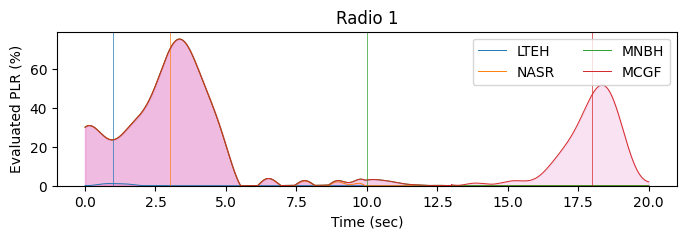

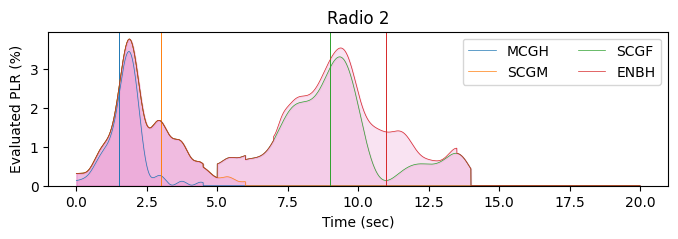

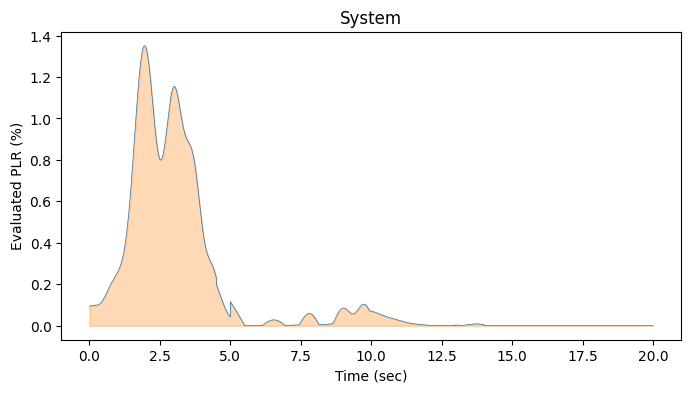

In [64]:
import matplotlib.pylab as plt

predict_time = 20
spr = 500
x = [s/spr for s in list(range(1, predict_time * spr + 1))]

radio1 = { 'LTEH': 1, 'NASR': 3, 'MNBH': 10, 'MCGF': 18 } 
radio2 = { 'MCGH': 1.5, 'SCGM': 3, 'SCGF': 9, 'ENBH': 11 }

Y1 = []
Yp1 = []

fig, ax = plt.subplots(figsize=(8, 2))
for i, (key, center) in enumerate(radio1.items()):
    # print(i, key, center)
    y = poly_approx(coef_dl_lost.copy(), x, lookup[key], center)
    Yp1.append(y)
    
    y = [sum(s) for s in zip(*Yp1)]
    
    line, = ax.plot(x, y, lw=0.7, label=key)
    line_color = line.get_color()

    ax.axvline(center, lw=0.5, c=line_color)
    ax.fill_between(x, y, color='tab:pink', alpha=0.2)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Evaluated PLR (%)')
    
    if i == len(radio1) - 1:
        Y1 = y[:]

ax.set_title('Radio 1')
ax.set_ylim(bottom=0)
ax.legend(ncol=2)
plt.show()

# ****************************************************************
Y2 = []
Yp2 = []

fig, ax = plt.subplots(figsize=(8, 2))
for i, (key, center) in enumerate(radio2.items()):
    # print(i, key, center)
    y = poly_approx(coef_dl_lost.copy(), x, lookup[key], center)
    Yp2.append(y)
    
    y = [sum(s) for s in zip(*Yp2)]
    
    line, = ax.plot(x, y, lw=0.5, label=key)
    line_color = line.get_color()
    
    ax.axvline(center, lw=0.7, c=line_color)
    ax.fill_between(x, y, color='tab:pink', alpha=0.2)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Evaluated PLR (%)')
    
    if i == len(radio1) - 1:
        Y2 = y[:]

ax.set_title('Radio 2')
ax.set_ylim(bottom=0)
ax.legend(ncol=2)
plt.show()

# ****************************************************************
y = [s1*s2/100 for (s1, s2) in zip(Y1, Y2)]
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, lw=0.5)
ax.fill_between(x, y, color='tab:orange', alpha=0.3)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Evaluated PLR (%)')
ax.set_title('System')

plt.show()